In [2]:
import h5py

In [3]:
import flammkuchen as fl
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def calculate_iou(rect1, rect2):
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2

    # Calculating coordinates of intersection rectangle
    x_left = max(x1, x2)
    y_top = max(y1, y2)
    x_right = min(x1 + w1, x2 + w2)
    y_bottom = min(y1 + h1, y2 + h2)

    if x_right < x_left or y_bottom < y_top:
        return 0.0  # No intersection

    # area of intersection rectangle
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # area of both rectangles
    area1 = w1 * h1
    area2 = w2 * h2

    # union area
    union_area = area1 + area2 - intersection_area

    # Calculating IoU
    iou = intersection_area / union_area
    return iou

In [5]:
data = fl.load('rectangles.dsss')
data.keys()

dict_keys(['ground_truth', 'predicted'])

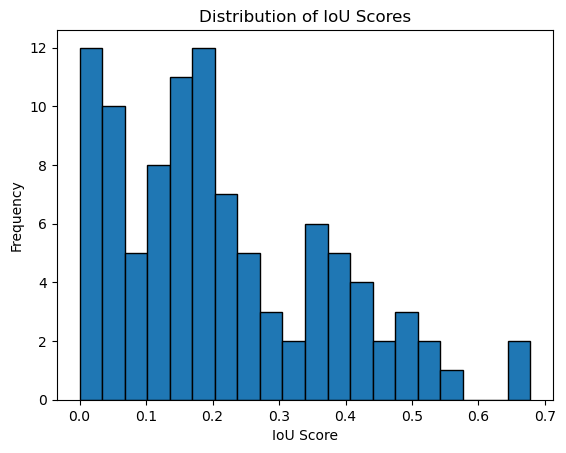

In [6]:
# Calculate IoU for each pair of rectangles
iou_scores = []
ground_truth_rectangles = data['ground_truth']
predicted_rectangles = data['predicted']

for i in range(len(ground_truth_rectangles)):
    iou = calculate_iou(ground_truth_rectangles[i], predicted_rectangles[i])
    iou_scores.append(iou)

# Plotting histogram of IoU scores
plt.hist(iou_scores, bins=20, edgecolor='black')
plt.xlabel('IoU Score')
plt.ylabel('Frequency')
plt.title('Distribution of IoU Scores')
plt.show()


In [19]:
!pip install albumentations

  Obtaining dependency information for albumentations from https://files.pythonhosted.org/packages/9b/f6/c486cedb4f75147232f32ec4c97026714cfef7c7e247a1f0427bc5489f66/albumentations-1.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python-headless>=4.1.1 from https://files.pythonhosted.org/packages/9d/d7/e2aaf344254292d2046f9984b54212e4e7d69a57d30ae15e7294840710f6/opencv_python_headless-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 1.3 MB/s eta 0:00:00MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [20]:
import cv2
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import albumentations as albm

In [14]:
np.random.seed(23272000)


In [156]:
num = np.random.randint(100)
img = cv2.imread('Mini_BAGLS_dataset/'+str(num)+'.png')
mask = cv2.imread('Mini_BAGLS_dataset/'+str(num)+'_seg.png')

In [144]:
def visualize(image, mask, original_image=None, original_mask=None, trans_text='transformed'):
    fontsize = 10
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 2, figsize=(8, 8))

        ax[0].imshow(image)
        ax[0].set_title('Original image', fontsize=fontsize)
        ax[1].imshow(mask)
        ax[1].set_title('Original mask', fontsize=fontsize)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[0, 1].imshow(original_mask)
        ax[0, 1].set_title('Original mask', fontsize=fontsize)
        
        ax[1, 0].imshow(image)
        ax[1, 0].set_title(trans_text +' image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title(trans_text+ ' mask', fontsize=fontsize)

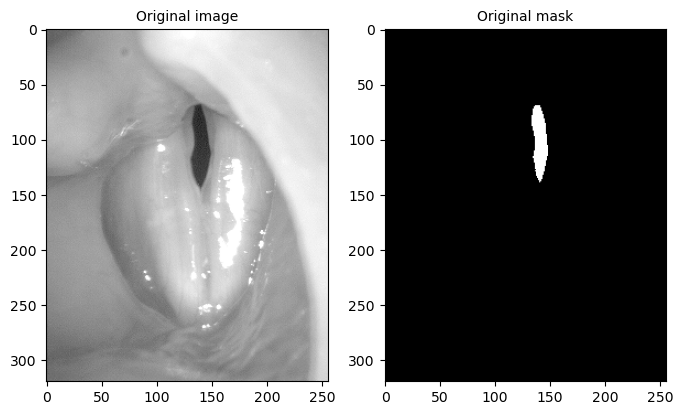

In [157]:
visualize(img, mask)

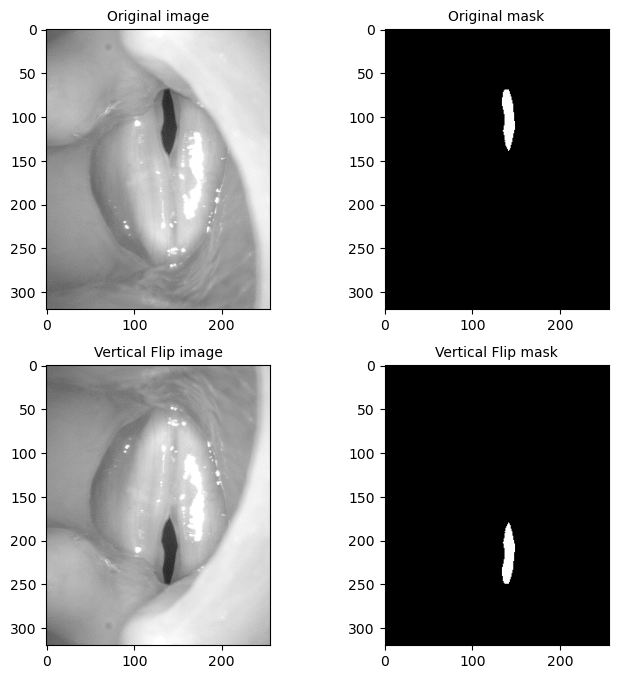

In [158]:
aug = albm.VerticalFlip(p=1)

augmented = aug(image=img, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visualize(image_h_flipped, mask_h_flipped, original_image=img, original_mask=mask,trans_text='Vertical Flip')

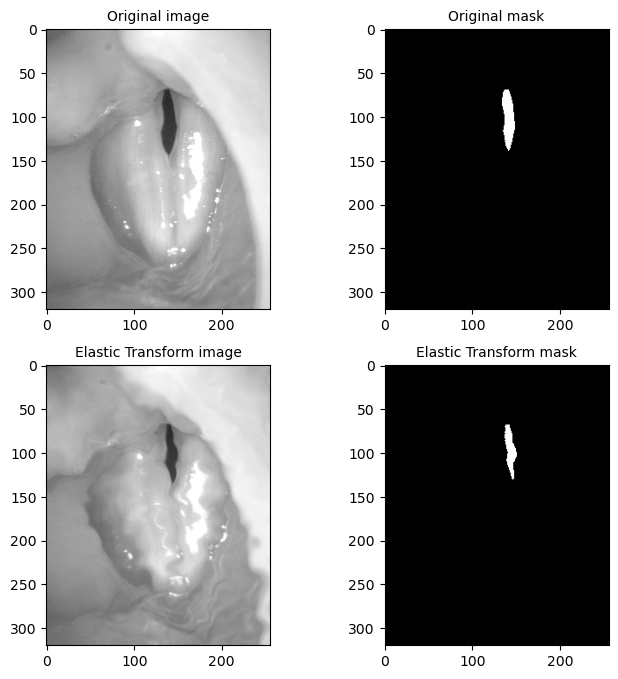

In [159]:
aug = albm.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)

np.random.seed(7)
augmented = aug(image=img, mask=mask)

image_elastic = augmented['image']
mask_elastic = augmented['mask']

visualize(image_elastic, mask_elastic, original_image=img, original_mask=mask, trans_text='Elastic Transform')
